# Центральная предельная теорема своими руками
---
Для данного задания было выбрано **логнормальное распределение**, плотность вероятности которого имеет вид:
$$ f(x) = \dfrac{1}{x \sigma \sqrt{2 \pi}} e^{-\dfrac{(\ln{x} - \mu)^2}{2 \sigma^2}} $$
Возьмём $\mu = 0$, $\sigma = 1$. Тогда *математическое ожидание* и *дисперсия* случайной величины $x$ для этого распределения определяются следующим образом:
$$ \mathbb{E}(x) = e^{\mu + \frac{\sigma^2}{2}} = e^{\frac{1}{2}}$$
$$ \mathbb{D}(x) = (e^{\sigma^2} - 1) e^{2\mu + \sigma^2} = (e - 1)e$$
---

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Зададим значения математического ожидания и дисперсии для рассматриваемого распределения.

In [2]:
ln_mu = 0
ln_sigma = 1
lognorm_rv = sts.lognorm(ln_sigma)

Сгенерируем из данного распределения выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины.

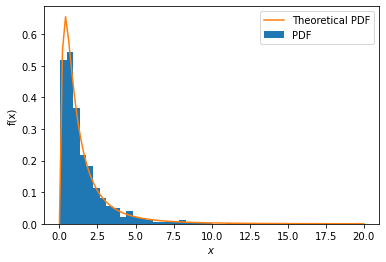

In [3]:
x = np.linspace(0, 20, 100)

sample = lognorm_rv.rvs(1000)
pdf = lognorm_rv.pdf(x)

plt.hist(sample, bins = 40, density = True, label = 'PDF')
plt.plot(x, pdf, label = 'Theoretical PDF')
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.legend()

Оценим распределение выборочного среднего нашей случайной величины при разных объёмах выборок. Для этого при n = 2, 5, 10, 50, 200 сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения, посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. **Обратим внимание:** для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию нашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения.
$$ \mathbb{E}(\overline{x}_n) = \mathbb{E}(x) = e^{\frac{1}{2}} $$
$$ \mathbb{D}(\overline{x}_n) = \dfrac{\mathbb{D}(x)}{n} = \dfrac{(e - 1) e}{n} $$

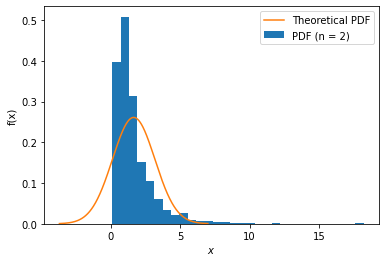

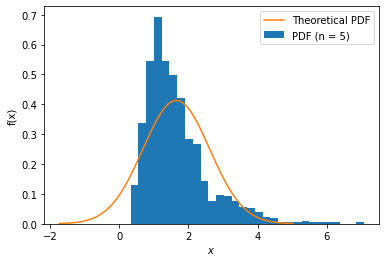

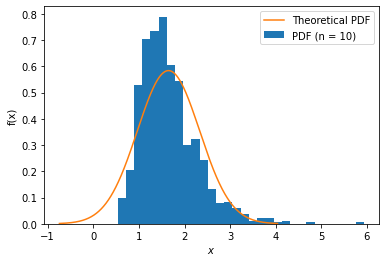

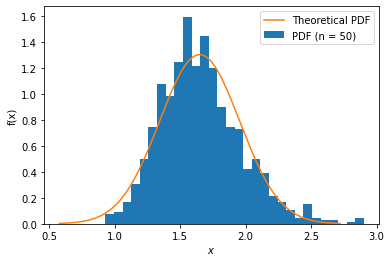

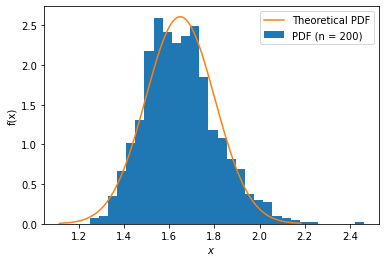

In [4]:
for n in [2, 5, 10, 50, 200]:
    
    mu = np.exp(1/2)
    sigma = np.sqrt(((np.exp(1) - 1) * np.exp(1))/n)
    x = np.linspace(mu - 3.5 * sigma, mu + 3.5 * sigma, 1000)
    
    samples = [lognorm_rv.rvs(n) for k in range(1000)]
    samples_mean = [np.mean(samples[k]) for k in range(1000)]
    
    norm_rv = sts.norm(loc = mu, scale = sigma)
    pdf = norm_rv.pdf(x)
    
    plt.hist(samples_mean, bins = 30, density = True, label = 'PDF (n = %d)' % n)
    plt.plot(x, pdf, label = 'Theoretical PDF')
    plt.ylabel('f(x)')
    plt.xlabel('$x$')
    plt.legend()
    plt.show()

## Выводы
Таким образом, в результате работы было проверено, что с увеличением объёма выборки гистограмма сглаживается, а точность нормальной аппроксимации увеличивается. Это в действительности подтверждает справедливость Центральной предельной теоремы.